# Regression

In [2]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data

--2023-07-22 15:10:26--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M   781KB/s    in 1.8s    

2023-07-22 15:10:28 (781 KB/s) - ‘data.csv’ saved [1475504/1475504]



In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [5]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
df.head()
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# Explorary Data Analysis

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print("\n")

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']


model
['1_series_m' '1_series' '100' '124_spider' '190-class']


year
[2011 2012 2013 1992 1993]


engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']


engine_hp
[335. 300. 230. 320. 172.]


engine_cylinders
[ 6.  4.  5.  8. 12.]


transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']


driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']


number_of_doors
[ 2.  4.  3. nan]


market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']


vehicle_size
['compact' 'midsize' 'large']


vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']


highway_mpg
[26 28 27 25 24]


city_mpg
[19 20 18 17 16]


popularity
[3916 3105  819  617 1013]


msrp
[46135 40650 36350 29450 34500]




In [10]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


# Distribution of Price

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

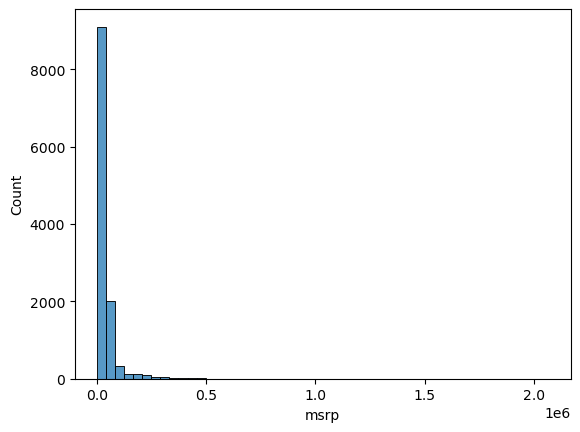

In [12]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

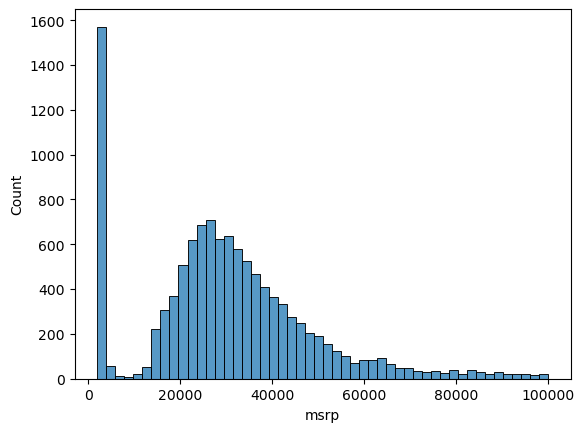

In [13]:
sns.histplot(df.msrp[df.msrp<100000], bins=50)

In [14]:
np.log1p([0,1,2,3,4])

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

In [15]:
price_log=np.log1p(df.msrp)
price_log

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

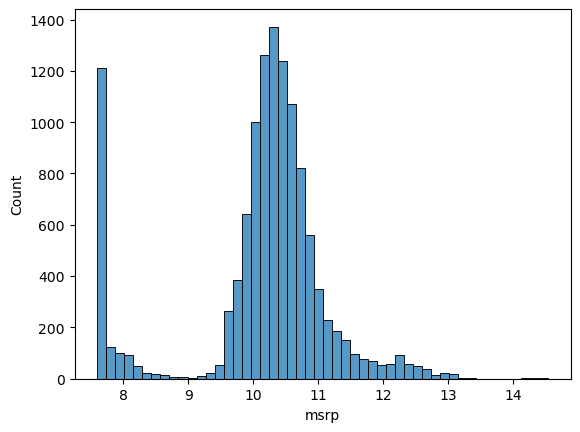

In [16]:
sns.histplot(price_log, bins=50)

In [17]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up Validation Framework
| Train Data | Validation | Test |
| ---------- | ---------- | ----- |
| 60 % | 20% | 20% |

In [18]:
n = len(df)
val_n = int(n * 0.2)
test_n = int(n*0.2)
train_n = int(n*0.6) # it could miss some data thats why we subtract sum from(test+train) 

train_n = n - val_n - test_n

test_n , val_n , train_n

(2382, 2382, 7150)

In [19]:
df.iloc[[10,0,3,5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [20]:
df_train = df.iloc[:train_n]
df_val = df.iloc[train_n:train_n+ val_n]
df_test = df.iloc[train_n+val_n:]
len(df_train) , len(df_val) , len(df_test)

(7150, 2382, 2382)

# Shuffling the list of index to avoid missing out possible data sets

In [21]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [22]:
np.random.seed(2)
np.random.shuffle(idx)
df.iloc[9]

make                                         bmw
model                                   1_series
year                                        2013
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  230.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category                           luxury
vehicle_size                             compact
vehicle_style                        convertible
highway_mpg                                   27
city_mpg                                      18
popularity                                  3916
msrp                                       37200
Name: 9, dtype: object

In [23]:
df_train = df.iloc[idx[:train_n]]
df_val = df.iloc[idx[train_n:train_n+ val_n]]
df_test = df.iloc[idx[train_n+val_n:]]

In [24]:
df_train =df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [25]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [26]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [27]:
len(y_train)

7150

# Linear Regression Simple

$g(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$

$g(x_i) = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$.

In [28]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [29]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [30]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [31]:
linear_regression(xi)

12.312

## ဘာကြောင့်Expand ပြန်လုပ်လဲဆိုတော့ နံပါတ်တွေကို Log ပြောင်းထားလို့

In [32]:
np.expm1(12.312)

222347.2221101062

# Linear Regression Vector

In [33]:
def dot(xi,w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [34]:
def linear_regression(xi):
    return w0+dot(xi,w)

In [35]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [36]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [37]:
linear_regression(xi)

12.312

In [38]:
x1  = [1, 148, 24, 1385] # Feature A
x2  = [1, 132, 25, 2031] # Feature B
x10 = [1, 453, 11, 86] # Feature C

X = [x1,x2,x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [39]:
def linear_regression(X):
    return X.dot(w_new)

In [40]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Train a linear regression model

**Normal Equation**

w^= $(X^TX)^{-1} (X^Ty)$

In [41]:
def train_linear_regression(X,y):
    pass

In [42]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [43]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
# X = np.column_stack([ones, X])


In [45]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000] # Possible Price Predictions

In [46]:
XTX = X.T.dot(X) # Gram matrix
XTX
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)
w_full



array([ 26.08419498, 286.12285934,   3.93813107])

In [47]:
w0 = w_full[0]
w = w_full[1:]
w0,w

(26.08419497680291, array([286.12285934,   3.93813107]))

In [48]:
def train_linear_regression(X, y):
    # Adding Dummy Column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    # Normal Equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0,w

In [49]:
train_linear_regression(X,y)

(25844.75405576687, array([ -16.08906468, -199.47254894,   -1.22802883]))

# Car Price Base Line Model

In [50]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [51]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values
print(X_train)
print(y_train)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)


[[ 148.    4.   33.   24. 1385.]
 [ 132.    4.   32.   25. 2031.]
 [ 148.    4.   37.   28.  640.]
 ...
 [ 285.    6.   22.   17.  549.]
 [ 563.   12.   21.   13.   86.]
 [ 200.    4.   31.   22.  873.]]
[ 9.57574708  9.887663    9.89323518 ... 10.45380308 12.62248099
 10.54061978]


In [52]:
w0

7.927257388069938

In [53]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

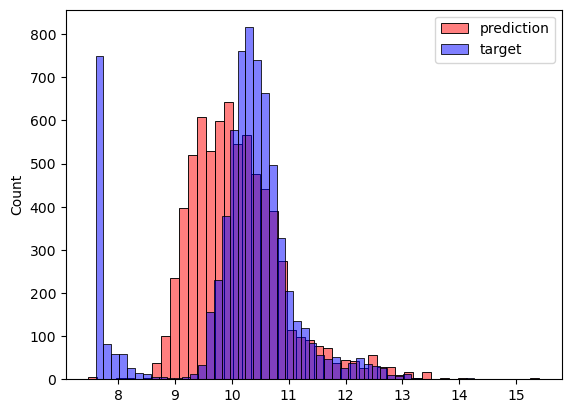

In [54]:
sns.histplot(y_pred, color='red', label="prediction", alpha=0.5, bins=50)
sns.histplot(y_train, color='blue',label="target", alpha=0.5, bins=50)
plt.legend()

# RMSE 

RMSE = $\sqrt{\frac{1}{m}\Sigma_{i=1}^{m}{\Big(\frac{g(x)i -y(i)})^2}} $

In [55]:
# ([1,2,3,4,5] - [0.9,2.5,3.1,4.1,5.3]) ** 2
# mean နဲ့ ပြန်မြှောက်
# တကယ့် အမှန်ကို ပြန်လိုချင်တဲ့ အတွက် Sqrt နဲ့ ပြန်လုပ်
def rmse(y, y_pred):
    se = (y - y_pred) ** 2 # (RealData - Predict Data) square
    mse = se.mean() # Mean ကိုရှာ
    return np.sqrt(mse) # ရတဲ့ Mean ကို Square Root လုပ်

In [56]:
rmse(y_train, y_pred)

0.7554192603920133

# Validation Model

In [57]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [58]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7616530991301607

# Feature Engineering

In [59]:
df_train['age'] = 2017 - df_train.year
df_train.year

0       2008
1       2012
2       2016
3       1991
4       2017
        ... 
7145    2015
7146    2015
7147    2015
7148    2014
7149    2017
Name: year, Length: 7150, dtype: int64

In [60]:

def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017- df.year
    features.append('age')
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [61]:
X_train = prepare_X(df_train) 
w_0, w = train_linear_regression(X_train, y_train) 
X_val = prepare_X(df_val) 
y_pred = w_0 + X_val.dot(w) 
print('validation:', rmse(y_val, y_pred)) 

validation: 0.5172055461058338


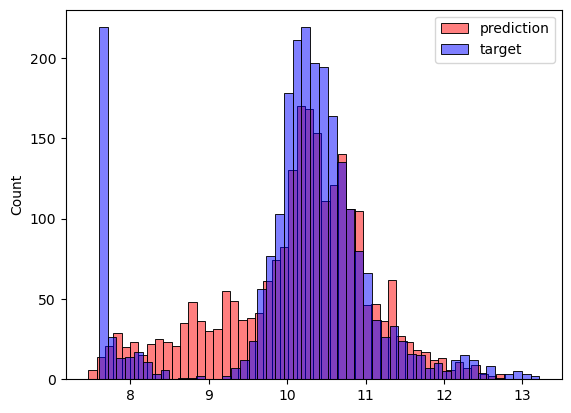

In [62]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

# Categorical Variable

In [63]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)


In [64]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [65]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

416.8831235468104

In [66]:
w0,w

(-676260605536135.5,
 array([-2.31618135e+00, -5.76071434e+01, -2.42477255e+01, -2.69964739e+01,
        -9.87744658e-03, -2.25493039e+01, -2.03920155e+04, -2.07483525e+04,
        -2.05310329e+04, -1.79150239e+01, -5.01139850e+01,  6.61376804e+00,
        -7.27371782e+00, -4.57447468e+01, -1.58189923e+02,  1.47084995e+01,
        -1.25396886e+02, -1.27339814e+02, -9.30594800e+01, -1.43604335e+03,
        -1.30062529e+03, -1.47565034e+03, -1.24365808e+03, -1.51001812e+03,
         6.76260606e+14,  6.76260606e+14,  6.76260606e+14,  6.76260606e+14,
        -7.59797266e+00,  1.18545048e+01,  1.24290795e+00, -2.03010631e+01,
        -3.33912602e+01,  5.81707625e+02,  6.30548339e+02,  6.39174504e+02,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

# Regularization

Regularization က ဘာလို့လုပ်လဲဆိုတော့ ကိုယ့်ရဲ့ Training Model က Overfitting(ရှိသမျှ Feature တိုင်း ကိုပါထည့်သွင်းပြီး Train ထားရင်) ဖြစ်ရင်လုပ်ရတယ်

Scikit Learn လိုမျိုးမှာဆိုရင် Regularization ကို Ridge လို့လဲခေါ်လေ့ရှိတယ်



In [67]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [68]:
y= [1, 2, 3, 1, 2, 3]

In [69]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [76]:
XTX_inv.dot(X.T).dot(y)

array([-0.00054332,  0.0125471 , -0.00016576])

In [78]:
np.linalg.inv(XTX)

array([[ 3.85624712e-02, -1.98159300e-02, -1.98158861e-02],
       [-1.98159300e-02,  5.00124975e+01, -4.99875026e+01],
       [-1.98158861e-02, -4.99875026e+01,  5.00124974e+01]])

In [79]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [80]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4608208286178567